# Linear Regression
It is a supervised learning algorithm which is both a statistical and a machine learning algorithm. It is used to predict the real-valued output y based on the given input value x. It depicts the relationship between the dependent variable y and the independent variables xi  ( or features ). The hypothetical function used for prediction is represented by h( x ).
```
    h( x ) = w * x + b  

    here, b is the bias.
    x represents the feature vector
    w represents the weight vector.
```

Linear regression with one variable is also called univariant linear regression.  After initializing the weight vector, we can find the weight vector to best fit the model by ordinary least squares method or gradient descent learning.

Mathematical Intuition: The cost function (or loss function) is used to measure the performance of a machine learning model or quantifies the error between the expected values and the values predicted by our hypothetical function. The cost function for Linear Regression is represented by J.

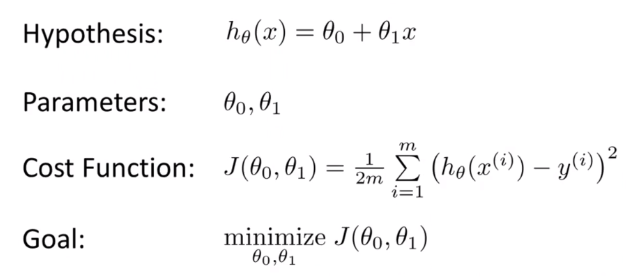


### Cost Function

So far we have a hypothesis that we know will give us our required predictions. But how do we evaluate how well our hypothesis function performs. Its important to know how accurate our predictions are in order to know how well our model performs and if it needs further“training” or more “tuning” (which is basically adjustment of the parameters). This is where the cost function comes into the picture.

The cost function is an expression through which we evaluate the quality of our current hypothesis and proceed to make changes accordingly. In simpler words, our cost function decides the cost we want our model to incur depending on how far off our predictions are from the true value. It is only intuitive to think that the “cost” should in fact be the difference between our prediction and the true value i.e. h(x)-y. This actually is a correct intuition and thus we arrive at our cost function for linear regression:

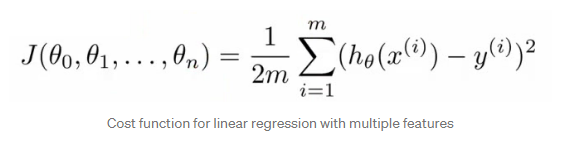



In [223]:
def cost_function(x, y, theta):
    m = y.shape[0]
    J = (1/(2*m))*np.sum(np.square(h(x, theta) - y))
    return J

In [224]:
#def cost_function(x, y, theta):
#    return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

### Gradient Descent
**But why minimize the cost?**
From the equation of the cost function it is quite clear that the cost function J(θ) is directly proportional to square of the difference between our prediction i.e. h(x) and the true value or the label y. Since, we want our predictions to be very close or equal to the true values we will obviously need the difference between the two to be as small as possible and hence we must minimize the cost function.

**So how do we minimize this cost function? Enter Gradient Descent!**

Gradient Descent in our context is an optimization algorithm that aims to adjust the parameters (θ0 and θ1 here) in order to minimize the cost function J(θ0,θ1).

Lets think about it this way, imagine a bowl. Any point on this bowl is the current cost and our aim is to reach the bottom of the bowl which is called the “global optimum or minima”. This is exactly what gradient descent tries to achieve. It selects parameters, evaluates the cost and then adjusts these parameters so as to get a lower cost than the previous one hence inching a step closer to the minimum. Once we reach the global minimum or intuitively the bottom of the bowl we will have the best parameters for our hypothesis function and hence be able to make accurate predictions.

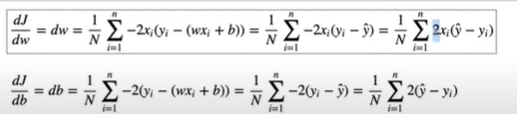

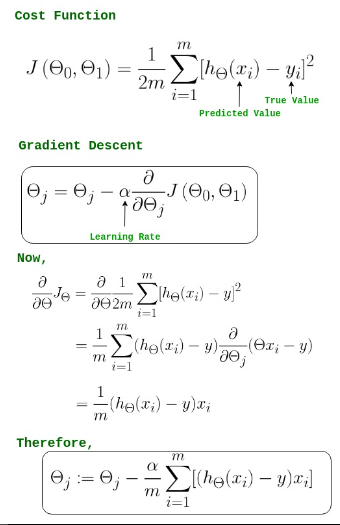

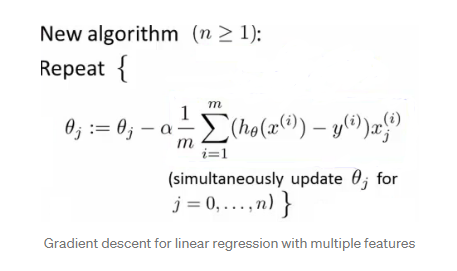

This equation is the main “update” step of gradient descent where after minimizing the cost we attempt to update our parameters in the right direction. α here is the learning rate. I suggest you develop a deeper understanding of gradient descent if you haven’t already in order to be able to understand linear regression (and in fact all machine learning algorithms for that matter) better.

### 1. Importing Libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import os

%matplotlib inline

### 2. Developing class for linear regression

In [34]:
import numpy as np

class LinearRegression():
    
    def __init__(self, lr=0.01, n_iters=500):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = 0
        self.bias = 0

    def cost_function(self, X, y):
        m = y.shape[0]
        J = (1/(2*m))*np.sum(np.square(self.predict(X) - y))
        return J

    def fit(self, X, y):
        """
        This methods trains the linear regression model i.e. it includes below steps:
        1) Weights & bias initialization
        2) For each iteration 
            a) Make predictions 
            b) Compute Gradient for Cost Function.
            c) Update the weights. 
        """
        n_samples, n_features = X.shape
        # Initialization of weights & bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        dict_ = {"weights":[],"bias":[],"cost":[]}
        for i in range(self.n_iters):   
            # approximate y with linear combination of weights and x, plus bias    
            y_predicted = self.predict(X)
            self.plot(X, y, y_predicted, i)
            # Computing gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted -y)) 
            db = (1/n_samples) * np.sum(y_predicted - y)
            # Updating weights            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            cost = self.cost_function( X, y)
            print(f"Weights:{self.weights} Bias:{self.bias} Cost:{cost}")
            dict_["weights"].append(self.weights)
            dict_["bias"].append(self.bias)
            dict_["cost"].append(cost)
        return dict_

    def predict(self, X):
        # Dot product and matrix multiplication of 2 vectors provide same result
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

    def plot(self, X_train, y_train, y_predicted, n):
        if not os.path.exists("images"):
            os.mkdir("images")
            
        if n % 5==0:
            path = f"images/output_{n:05}.jpg"
            font = {'family':'serif','color':'black','size':14}
            font1 = {'family':'serif','color':'blue','size':20}
            fig = plt.figure(figsize=(8,6))
            plt.scatter(X_train, y_train)
            plt.plot(X_train, y_predicted)
            title = f"Iteration : {n:04}"
            plt.title(title, fontdict = font1)
            plt.xlabel("Independent Variable", fontdict = font)
            plt.ylabel("Dependent Variable", fontdict = font)
            plt.savefig(path, dpi=100)
            plt.close(fig)

In [35]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

In [36]:
def standardize(data):
    for i in range(0,data.shape[1]-1):
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
    return data

### 3.  Data Preparation

In [37]:
# Creating dummmy dataset for linear regression
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=10)
print("Feature Shape: ",X.shape)
print("Output Shape: ",y.shape)

Feature Shape:  (100, 1)
Output Shape:  (100,)


### 4. Model Training

In [38]:
lr = 0.01
n_iters = 500
regressor = LinearRegression(lr=lr,n_iters=n_iters)
summary = regressor.fit(X_train, y_train)

Weights:[0.67669999] Bias:-0.03709326514545932 Cost:2650.44073346146
Weights:[1.34730626] Bias:-0.07348026557318864 Cost:2605.540799634887
Weights:[2.01187387] Bias:-0.10917108361140361 Cost:2561.448471210728
Weights:[2.67045739] Bias:-0.144175673481261 Cost:2518.149169087461
Weights:[3.32311087] Bias:-0.17850386282535566 Cost:2475.628578392152
Weights:[3.9698879] Bias:-0.21216535421867982 Cost:2433.8726436711368
Weights:[4.61084156] Bias:-0.2451697266622404 Cost:2392.867564168641
Weights:[5.24602445] Bias:-0.2775264370595284 Cost:2352.599789191721
Weights:[5.87548871] Bias:-0.30924482167603207 Cost:2313.0560135599426
Weights:[6.499286] Bias:-0.3403340975819834 Cost:2274.223173138236
Weights:[7.1174675] Bias:-0.3708033640785252 Cost:2236.088440451402
Weights:[7.73008394] Bias:-0.4006616041074849 Cost:2198.639220378775
Weights:[8.33718559] Bias:-0.4299176856449377 Cost:2161.8631459275553
Weights:[8.93882225] Bias:-0.4585803630787412 Cost:2125.7480740833853
Weights:[9.53504328] Bias:-0.4

Weights:[50.01955363] Bias:-1.423115281582637 Cost:433.71468736051804
Weights:[50.24647865] Bias:-1.4211906928495042 Cost:428.5879163758863
Weights:[50.47136732] Bias:-1.4191728995260888 Cost:423.5527001887067
Weights:[50.69423796] Bias:-1.4170638427530418 Cost:418.6073990315647
Weights:[50.91510875] Bias:-1.4148654351771843 Cost:413.7504026003175
Weights:[51.13399767] Bias:-1.4125795613184642 Cost:408.9801295228248
Weights:[51.35092256] Bias:-1.4102080779324984 Cost:404.295026837296
Weights:[51.56590111] Bias:-1.4077528143687545 Cost:399.69356948007817
Weights:[51.77895081] Bias:-1.4052155729244198 Cost:395.1742597827155
Weights:[51.99008904] Bias:-1.4025981291940086 Cost:390.73562697811013
Weights:[52.19933299] Bias:-1.399902232414757 Cost:386.3762267156189
Weights:[52.40669971] Bias:-1.3971296058078535 Cost:382.0946405849248
Weights:[52.61220609] Bias:-1.3942819469155534 Cost:377.8894756485222
Weights:[52.81586887] Bias:-1.3913609279342252 Cost:373.7593639826612
Weights:[53.01770463

Weights:[66.74129801] Bias:-0.8941901820643355 Cost:179.3745983699889
Weights:[66.81835925] Bias:-0.8892685472857068 Cost:178.78099163697772
Weights:[66.89473109] Bias:-0.8843579419084358 Cost:178.19792622080587
Weights:[66.9704197] Bias:-0.8794585972679292 Cost:177.62521450439445
Weights:[67.04543122] Bias:-0.8745707393218387 Cost:177.06267221838218
Weights:[67.11977171] Bias:-0.8696945887314073 Cost:176.51011838122196
Weights:[67.1934472] Bias:-0.8648303609417528 Cost:175.96737524035328
Weights:[67.26646365] Bias:-0.859978266261103 Cost:175.4342682144302
Weights:[67.33882697] Bias:-0.8551385099389927 Cost:174.91062583658604
Weights:[67.41054302] Bias:-0.8503112922434378 Cost:174.3962796987163
Weights:[67.4816176] Bias:-0.8454968085370977 Cost:173.8910643967621
Weights:[67.55205647] Bias:-0.8406952493524371 Cost:173.39481747697428
Weights:[67.62186533] Bias:-0.835906800465902 Cost:172.90737938314268
Weights:[67.69104982] Bias:-0.8311316429711197 Cost:172.42859340477182
Weights:[67.759

Weights:[72.31984144] Bias:-0.4273869506405017 Cost:150.10546868418416
Weights:[72.34705049] Bias:-0.4243689554865177 Cost:150.0308574439326
Weights:[72.37401675] Bias:-0.421367657106444 Cost:149.95756564866812
Weights:[72.4007424] Bias:-0.41838300884184776 Cost:149.88556992458854
Weights:[72.42722959] Bias:-0.41541496342485745 Cost:149.81484731276564
Weights:[72.45348045] Bias:-0.41246347299390634 Cost:149.74537526176542
Weights:[72.4794971] Bias:-0.4095284891092315 Cost:149.67713162039945
Weights:[72.50528163] Bias:-0.40660996276813205 Cost:149.61009463060574
Weights:[72.53083611] Bias:-0.40370784441998947 Cost:149.5442429204566
Weights:[72.5561626] Bias:-0.4008220839810532 Cost:149.47955549729076
Weights:[72.58126315] Bias:-0.3979526308489948 Cost:149.4160117409686
Weights:[72.60613977] Bias:-0.39509943391723384 Cost:149.35359139724704
Weights:[72.63079447] Bias:-0.39226244158903784 Cost:149.29227457127283
Weights:[72.65522922] Bias:-0.38944160179140025 Cost:149.23204172119182
Weigh

Weights:[74.32029587] Bias:-0.17003983586679866 Cost:146.38875116309177
Weights:[74.32967259] Bias:-0.16860400621486663 Cost:146.379792536197
Weights:[74.33896585] Bias:-0.16717788831478864 Cost:146.37099182708877
Weights:[74.34817637] Bias:-0.1657614264126029 Cost:146.3623462484827
Weights:[74.35730491] Bias:-0.16435456494291492 Cost:146.35385306236313
Weights:[74.36635219] Bias:-0.16295724853031057 Cost:146.34550957911048
Weights:[74.37531894] Bias:-0.16156942199072571 Cost:146.33731315664454
Weights:[74.38420587] Bias:-0.16019103033277274 Cost:146.32926119958287
Weights:[74.3930137] Bias:-0.15882201875902469 Cost:146.32135115841402
Weights:[74.40174313] Bias:-0.15746233266725798 Cost:146.31358052868526
Weights:[74.41039486] Bias:-0.156111917651654 Cost:146.30594685020534
Weights:[74.41896959] Bias:-0.1547707195039604 Cost:146.29844770626056
Weights:[74.427468] Bias:-0.15343868421461296 Cost:146.29108072284535
Weights:[74.43589078] Bias:-0.15211575797381824 Cost:146.28384356790636
We

Text(0, 0.5, 'Loss (y)')

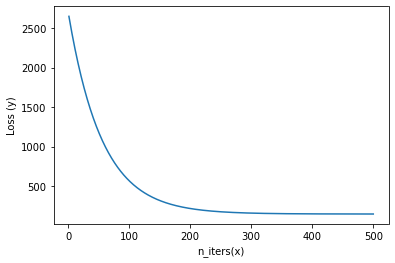

In [39]:
x = [i for i in range(1,n_iters+1)]
y = summary['cost']

plt.plot(x,y)
plt.xlabel("n_iters(x)")
plt.ylabel("Loss (y)")

### 5. Model Evaluation

In [40]:
# Model Prediction
y_pred = regressor.predict(X_test)

# Evaluating Model
mse_value = mse(y_test, y_pred)
print("MSE value: ", mse_value)

MSE value:  282.28660124470326


### 6. Plotting results

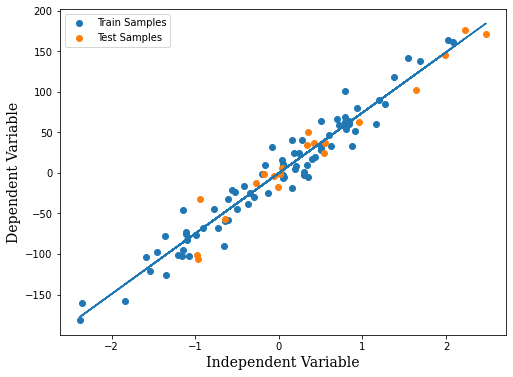

In [41]:
y_pred_line = regressor.predict(X)
font = {'family':'serif','color':'black','size':14}

plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, label="Train Samples")
plt.scatter(X_test, y_test, label="Test Samples")
plt.plot(X, y_pred_line)
plt.savefig("images/final_result.jpg")
plt.legend(loc="upper left")
plt.xlabel("Independent Variable", fontdict = font)
plt.ylabel("Dependent Variable", fontdict = font)
plt.show()

### 7. Making GIF

In [42]:
import imageio
import glob

In [43]:
# Reading filenames
folder = "images"
filenames = glob.glob(folder+os.sep+"output_*.jpg")
with imageio.get_writer('lr_train.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

<img src="lr_train.gif" width="550" align="center">